In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf

In [2]:
df = pd.read_csv('model_clean_data.csv')
df = df.sample(frac=1)
df

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
21645,1,51.0,0,0,1,0,114.16,35.2,0,0,0,0,1,0,1,0,0
3149,0,70.0,0,1,1,0,199.00,20.1,0,0,0,0,1,0,0,0,1
27258,0,45.0,1,0,1,0,100.04,42.3,0,0,0,1,0,0,0,1,0
13840,0,32.0,0,0,1,0,64.67,26.0,0,0,0,1,0,0,0,1,0
2187,0,80.0,1,0,1,1,86.50,31.7,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28748,1,67.0,0,0,1,0,95.61,36.5,0,0,0,1,0,0,0,1,0
17647,1,27.0,0,0,0,1,99.32,24.8,0,0,0,1,0,0,0,1,0
28131,0,14.0,0,0,0,0,101.60,25.3,0,0,0,0,0,1,0,1,0
15103,1,57.0,0,1,1,0,72.53,34.4,0,0,0,1,0,0,0,1,0


In [4]:
#Divide the target column and the features column
y = df['stroke']
X = df[['gender', 'age', 'residence_type', 'avg_glucose_level', 'bmi']]

In [5]:
print(X.shape)
print(y.shape)

(29065, 5)
(29065,)


In [7]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [6]:
# Split the data in training and testing using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=12)

In [8]:
#Scale the data using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [16]:
y_test.value_counts()

0    7141
1     126
Name: stroke, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_true = y_test
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_test, y_pred))
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

[[7141    0]
 [   0  126]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7141
           1       0.00      0.00      0.00       126

    accuracy                           0.98      7267
   macro avg       0.49      0.50      0.50      7267
weighted avg       0.97      0.98      0.97      7267

Training Data Score: 0.980640425727131
Testing Data Score: 0.9826613458098252


/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

y_true = y_test
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_true, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7141
           1       0.00      0.00      0.00       126

    accuracy                           0.98      7267
   macro avg       0.49      0.50      0.50      7267
weighted avg       0.97      0.98      0.97      7267

[[7139    2]
 [ 126    0]]
Training Score: 1.0
Testing Score: 0.9823861290766479


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
clf_x = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf_x.predict(X_test_scaled)
y_true = y_test
# confusion_matrix(y_true, y_pred)
# print(classification_report(y_test, y_pred))
print(f'Training Score: {clf_x.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_x.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9781202697123985


In [14]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
y_true = y_test
# confusion_matrix(y_true, y_pred)
# print(classification_report(y_test, y_pred))
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7127
           1       0.00      0.00      0.00       140

    accuracy                           0.98      7267
   macro avg       0.49      0.50      0.50      7267
weighted avg       0.96      0.98      0.97      7267

Training Score: 0.9812826864849986
Testing Score: 0.9807348286775835


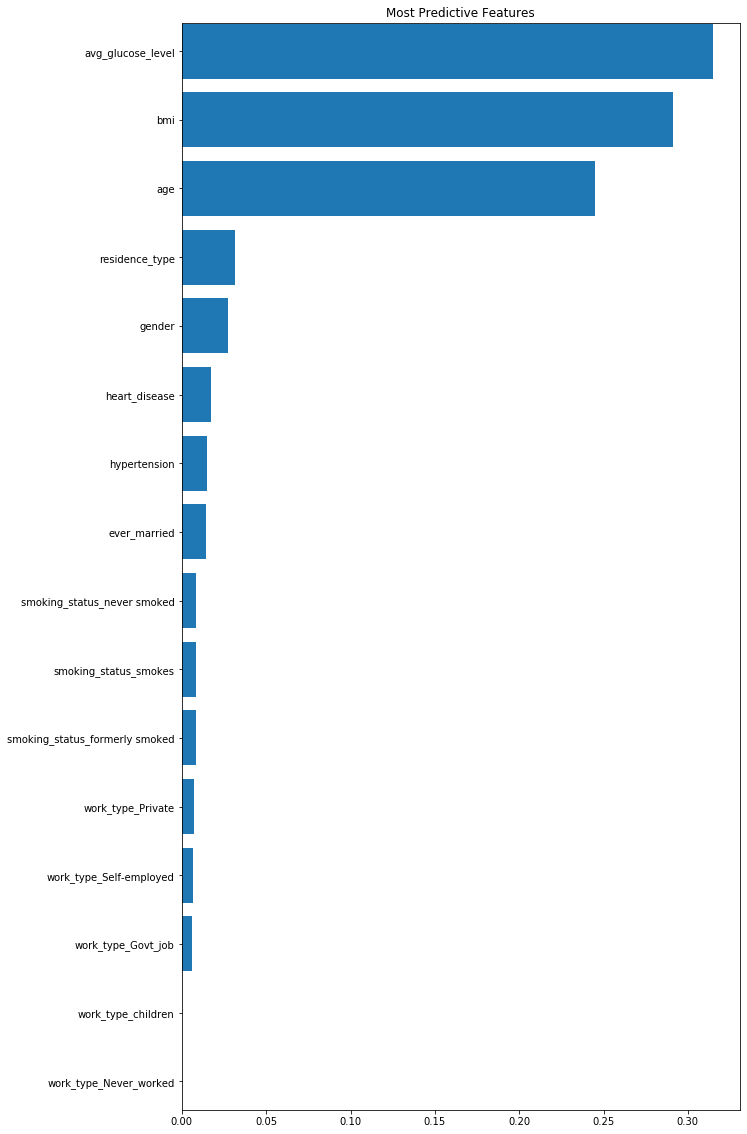

In [21]:
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, clf_x.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)


ax.barh(y=cols, width=width)
plt.title('Most Predictive Features')
plt.savefig('most_pred_features.png')

plt.show()

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.svm import SVR
test_model(LinearRegression(), data)
test_model(LogisticRegression(), data)
test_model(KNeighborsClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)



Model: LinearRegression
Train score: 0.026799989954274683
Test Score: 0.02393326294691167

Model: LogisticRegression
Train score: 0.980640425727131
Test Score: 0.9826613458098252

Model: KNeighborsClassifier
Train score: 0.9805486741902927
Test Score: 0.9825237374432365

Model: AdaBoostClassifier
Train score: 0.98068630149555
Test Score: 0.9826613458098252

Model: SVR
Train score: -1.7049853289305648
Test Score: -1.9432159585689353

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.9823861290766479

Model: ExtraTreesClassifier
Train score: 1.0
Test Score: 0.981422870510527



In [34]:
y_true = y_test
y_pred = lr.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[7127,    0],
       [ 140,    0]])

In [35]:
y_true = y_test
y_pred = clf_x.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[7108,   19],
       [ 140,    0]])

In [36]:
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[7125,    2],
       [ 140,    0]])

In [ ]:
print(y_test.value_counts())
print(y_train.value_counts())

In [37]:
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

-1.588587847978218e-05

In [38]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(lr)
sel.fit(X_train_scaled, y_train)
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)
reg = LogisticRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.9825237374432365

In [39]:
y_pred = reg.predict(X_selected_test_scaled)
y_true = y_test
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_test, y_pred))
print(f'Training Score: {reg.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {reg.score(X_selected_test_scaled, y_test)}')

[[7140    0]
 [ 127    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7140
           1       0.00      0.00      0.00       127

    accuracy                           0.98      7267
   macro avg       0.49      0.50      0.50      7267
weighted avg       0.97      0.98      0.97      7267

Training Score: 0.98068630149555
Testing Score: 0.9825237374432365


/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [42]:
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.964 total time=   1.0s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.962 total time=   1.0s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.964 total time=   1.0s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.961 total time=   1.0s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.963 total time=   1.0s
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.964 total time=   0.9s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.962 total time=   0.9s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.964 total time=   0.9s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.961 total time=   0.9s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.963 total time=   0.9s
[CV 1/5] END leaf_size=

[CV 5/5] END leaf_size=10, n_neighbors=17, weights=distance;, score=0.981 total time=   1.6s
[CV 1/5] END leaf_size=10, n_neighbors=19, weights=uniform;, score=0.981 total time=   1.9s
[CV 2/5] END leaf_size=10, n_neighbors=19, weights=uniform;, score=0.981 total time=   1.9s
[CV 3/5] END leaf_size=10, n_neighbors=19, weights=uniform;, score=0.981 total time=   1.8s
[CV 4/5] END leaf_size=10, n_neighbors=19, weights=uniform;, score=0.981 total time=   1.6s
[CV 5/5] END leaf_size=10, n_neighbors=19, weights=uniform;, score=0.981 total time=   1.6s
[CV 1/5] END leaf_size=10, n_neighbors=19, weights=distance;, score=0.981 total time=   1.8s
[CV 2/5] END leaf_size=10, n_neighbors=19, weights=distance;, score=0.981 total time=   1.8s
[CV 3/5] END leaf_size=10, n_neighbors=19, weights=distance;, score=0.981 total time=   1.8s
[CV 4/5] END leaf_size=10, n_neighbors=19, weights=distance;, score=0.981 total time=   1.6s
[CV 5/5] END leaf_size=10, n_neighbors=19, weights=distance;, score=0.981 t

[CV 5/5] END leaf_size=50, n_neighbors=15, weights=distance;, score=0.981 total time=   1.4s
[CV 1/5] END leaf_size=50, n_neighbors=17, weights=uniform;, score=0.981 total time=   1.8s
[CV 2/5] END leaf_size=50, n_neighbors=17, weights=uniform;, score=0.981 total time=   1.7s
[CV 3/5] END leaf_size=50, n_neighbors=17, weights=uniform;, score=0.981 total time=   1.7s
[CV 4/5] END leaf_size=50, n_neighbors=17, weights=uniform;, score=0.981 total time=   1.6s
[CV 5/5] END leaf_size=50, n_neighbors=17, weights=uniform;, score=0.981 total time=   1.5s
[CV 1/5] END leaf_size=50, n_neighbors=17, weights=distance;, score=0.981 total time=   1.7s
[CV 2/5] END leaf_size=50, n_neighbors=17, weights=distance;, score=0.981 total time=   1.6s
[CV 3/5] END leaf_size=50, n_neighbors=17, weights=distance;, score=0.981 total time=   1.5s
[CV 4/5] END leaf_size=50, n_neighbors=17, weights=distance;, score=0.981 total time=   1.6s
[CV 5/5] END leaf_size=50, n_neighbors=17, weights=distance;, score=0.981 t

[CV 4/5] END leaf_size=100, n_neighbors=13, weights=distance;, score=0.981 total time=   1.4s
[CV 5/5] END leaf_size=100, n_neighbors=13, weights=distance;, score=0.981 total time=   1.5s
[CV 1/5] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.981 total time=   1.9s
[CV 2/5] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.981 total time=   1.8s
[CV 3/5] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.981 total time=   1.7s
[CV 4/5] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.981 total time=   1.6s
[CV 5/5] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.981 total time=   1.6s
[CV 1/5] END leaf_size=100, n_neighbors=15, weights=distance;, score=0.981 total time=   1.8s
[CV 2/5] END leaf_size=100, n_neighbors=15, weights=distance;, score=0.981 total time=   1.6s
[CV 3/5] END leaf_size=100, n_neighbors=15, weights=distance;, score=0.981 total time=   1.6s
[CV 4/5] END leaf_size=100, n_neighbors=15, weights=distance;, sc

[CV 3/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.981 total time=   1.6s
[CV 4/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.981 total time=   1.6s
[CV 5/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.981 total time=   1.6s
[CV 1/5] END leaf_size=500, n_neighbors=13, weights=uniform;, score=0.981 total time=   1.9s
[CV 2/5] END leaf_size=500, n_neighbors=13, weights=uniform;, score=0.981 total time=   1.8s
[CV 3/5] END leaf_size=500, n_neighbors=13, weights=uniform;, score=0.981 total time=   1.8s
[CV 4/5] END leaf_size=500, n_neighbors=13, weights=uniform;, score=0.981 total time=   1.7s
[CV 5/5] END leaf_size=500, n_neighbors=13, weights=uniform;, score=0.981 total time=   1.7s
[CV 1/5] END leaf_size=500, n_neighbors=13, weights=distance;, score=0.981 total time=   1.8s
[CV 2/5] END leaf_size=500, n_neighbors=13, weights=distance;, score=0.981 total time=   1.7s
[CV 3/5] END leaf_size=500, n_neighbors=13, weights=distance;, sc

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 50, 100, 500],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
print(grid_clf.best_params_)
print(grid_clf.best_score_)

In [ ]:
param_grid = {
    'n_neighbors': np.arange(1,20,2),
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(1, 500)
}
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(model, param_grid, random_state=0, verbose=3)
random_clf.fit(X_train, y_train)
print(random_clf.best_params_)

In [44]:
predictions = grid_clf.predict(X_test)
print(classification_report(y_test, predictions
                            ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7140
           1       0.00      0.00      0.00       127

    accuracy                           0.98      7267
   macro avg       0.49      0.50      0.50      7267
weighted avg       0.97      0.98      0.97      7267



/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/novakradovic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .9)
data_scaled = StandardScaler().fit_transform(df)

model_pca = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data = model_pca)

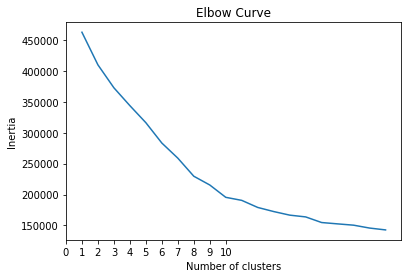

In [48]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 21))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()